In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [17]:
training_data_path = 'HW7_Pr3_S24_training_data.csv'
training_data = pd.read_csv(training_data_path)
testing_data_path = 'HW7_Pr3_S24_test_data.csv'
testing_data = pd.read_csv(testing_data_path)

X_train = training_data.iloc[:, :-1]
y_train = training_data.iloc[:, -1]
X_test = testing_data.iloc[:, :-1]
y_test = testing_data.iloc[:, -1]

def target_function(x1, x2):
    return 9 * (np.cos(0.5 * np.pi * x1) + 0.1) * np.sin((4 * np.pi)/(x1**2 + 1)) * np.sin(np.pi * x2)

In [18]:
linear_model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=1)

rmse_scores = []

for train_index, test_index in kf.split(X_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    linear_model.fit(X_train_cv, y_train_cv)
    
    y_pred_cv = linear_model.predict(X_test_cv)
    
    rmse = np.sqrt(mean_squared_error(y_test_cv, y_pred_cv))
    rmse_scores.append(rmse)

average_rmse = np.mean(rmse_scores)
std_deviation_rmse = np.std(rmse_scores)

average_rmse, std_deviation_rmse, rmse_scores

(2.4230326666925044,
 0.10087310310802289,
 [2.4047216336822994,
  2.2606004373509507,
  2.5763777749059633,
  2.4482933171050782,
  2.4251701704182307])

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


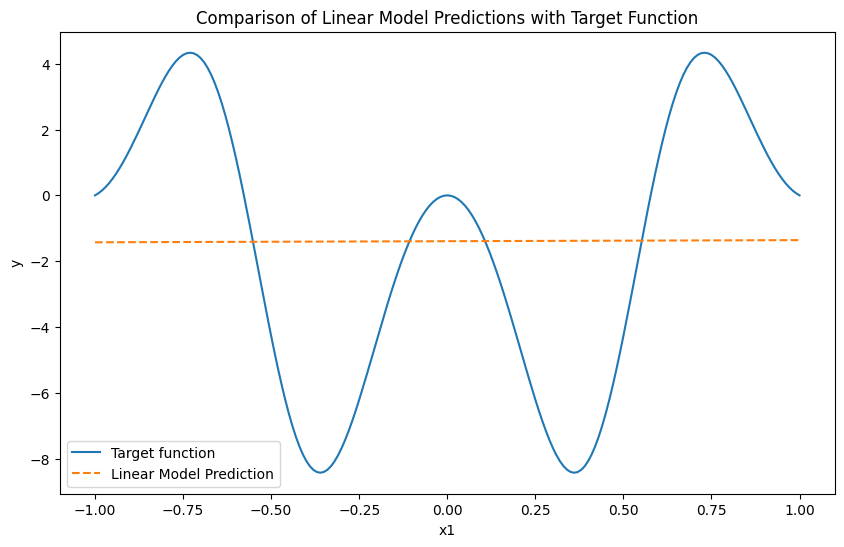

In [19]:
# Create a grid of x1 values
x1_values = np.arange(-1, 1.01, 0.01)  # From -1 to 1 with step size of 0.01
x2_value = 0.5
y_true = target_function(x1_values, x2_value)

# Plot for the first model
y_pred_model1 = linear_model.predict(np.column_stack((x1_values, np.full_like(x1_values, x2_value))))
plt.figure(figsize=(10, 6))
plt.plot(x1_values, y_true, label='Target function')
plt.plot(x1_values, y_pred_model1, label='Linear Model Prediction', linestyle='--')
plt.title('Comparison of Linear Model Predictions with Target Function')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()

In [20]:
linear_model.fit(X_train, y_train)

y_pred_test_b = linear_model.predict(X_test)
rmse_test_b = np.sqrt(mean_squared_error(y_test, y_pred_test_b))

print(f"Test RMSE for the linear regression model (part b): {rmse_test_b}")


Test RMSE for the linear regression model (part b): 2.520217183726972


In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

In [22]:
kf1 = KFold(n_splits=5, shuffle=False)

def rbf_kernel(X, centers, gamma):
    pairwise_sq_dists = euclidean_distances(X, centers, squared=True)
    return np.exp(-gamma * pairwise_sq_dists)

M = train_index.shape[0]
gamma_d = M/32
gamma_values = np.logspace(np.log10(0.01 * gamma_d), np.log10(100 * gamma_d), num=5)

avg_train_rmse_list = []
avg_val_rmse_list = []
std_val_rmse_list = []

for gamma in gamma_values:
    train_rmse = []
    val_rmse = []
    
    for train_index, test_index in kf1.split(X_train):
        X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[test_index]
        
        # Transform training and validation data
        X_train_rbf = rbf_kernel(X_train_cv, X_train_cv, gamma)
        X_val_rbf = rbf_kernel(X_val_cv, X_train_cv, gamma)
        
        # Fit the model and predict
        linear_model.fit(X_train_rbf, y_train_cv)
        y_train_pred = linear_model.predict(X_train_rbf)
        y_val_pred = linear_model.predict(X_val_rbf)
        
        # Calculate and store RMSE
        train_rmse.append(np.sqrt(mean_squared_error(y_train_cv, y_train_pred)))
        val_rmse.append(np.sqrt(mean_squared_error(y_val_cv, y_val_pred)))
    
    avg_train_rmse = np.mean(train_rmse)
    avg_val_rmse = np.mean(val_rmse)
    std_dev_val_rmse = np.std(val_rmse)
    
    avg_train_rmse_list.append(avg_train_rmse)
    avg_val_rmse_list.append(avg_val_rmse)
    std_val_rmse_list.append(std_dev_val_rmse)

    # Print RMSE results for the current gamma
    print(f"Gamma: {gamma}")
    print(f"Training RMSE for each fold: {train_rmse}")
    print(f"Validation RMSE for each fold: {val_rmse}")
    print(f"Average Training RMSE: {avg_train_rmse}")
    print(f"Average Validation RMSE: {avg_val_rmse}")
    print(f"Standard Deviation of Validation RMSE: {std_dev_val_rmse}")
    print('----------------------------------')

# After loop ends, find the best gamma value
best_gamma_index = np.argmin(avg_val_rmse_list)
best_gamma = gamma_values[best_gamma_index]
best_rmse = avg_val_rmse_list[best_gamma_index]
best_std_dev = std_val_rmse_list[best_gamma_index]

# Print the best gamma and corresponding RMSE statistics
print(f"Best Gamma: {best_gamma}")
print(f"Lowest Validation RMSE: {best_rmse}")
print(f"Standard Deviation of Validation RMSE at Best Gamma: {best_std_dev}")


Gamma: 0.25
Training RMSE for each fold: [0.19678606802845705, 0.20767968205396226, 0.21794534205148797, 0.20218713928960455, 0.21706329580518746]
Validation RMSE for each fold: [0.3026099137604182, 0.36998600689797123, 0.2588288045196081, 0.5063788740447002, 0.5287666295771054]
Average Training RMSE: 0.20833230544573986
Average Validation RMSE: 0.3933140457599606
Standard Deviation of Validation RMSE: 0.10769287342086382
----------------------------------
Gamma: 2.5
Training RMSE for each fold: [0.0005665606791644945, 0.0006418062758363196, 0.0007472707700161744, 0.0006449896604641005, 0.0005789694408214603]
Validation RMSE for each fold: [0.0019872695481201424, 0.002107831040354214, 0.002085552611962968, 0.0338046956454945, 0.007251790647773318]
Average Training RMSE: 0.0006359193652605099
Average Validation RMSE: 0.009447427898741029
Standard Deviation of Validation RMSE: 0.012343566481555709
----------------------------------
Gamma: 24.999999999999993
Training RMSE for each fold: [

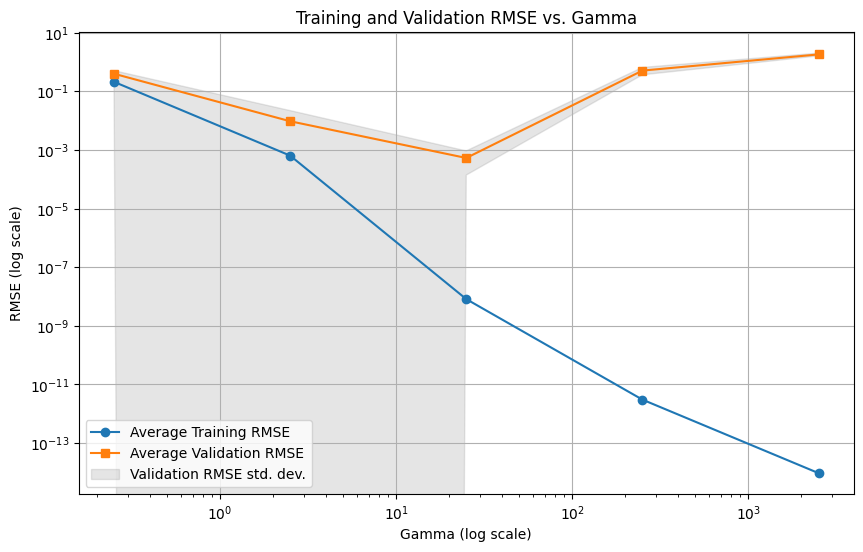

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(gamma_values, avg_train_rmse_list, marker='o', label='Average Training RMSE')
plt.plot(gamma_values, avg_val_rmse_list, marker='s', label='Average Validation RMSE')
plt.fill_between(gamma_values, 
                 np.array(avg_val_rmse_list) - np.array(std_val_rmse_list),
                 np.array(avg_val_rmse_list) + np.array(std_val_rmse_list),
                 color='gray', alpha=0.2, label='Validation RMSE std. dev.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Gamma (log scale)')
plt.ylabel('RMSE (log scale)')
plt.title('Training and Validation RMSE vs. Gamma')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
X_train_rbf_c = rbf_kernel(X_train, X_train, best_gamma)
X_test_rbf_c = rbf_kernel(X_test, X_train, best_gamma) 

linear_model.fit(X_train_rbf_c, y_train)

y_pred_test_c = linear_model.predict(X_test_rbf_c)
rmse_test_c = np.sqrt(mean_squared_error(y_test, y_pred_test_c))

print(f"Test RMSE for the RBF network model (part c) with gamma = {best_gamma}: {rmse_test_c}")


Test RMSE for the RBF network model (part c) with gamma = 24.999999999999993: 0.0007971246066772786


In [25]:
K_values=range(10, 101, 10)
Log_value = [0.01, 0.1, 1, 10, 100]

avg_train_rmse_per_gamma = {k: [] for k in K_values}
avg_val_rmse_per_gamma = {k: [] for k in K_values}
std_dev_val_rmse_per_gamma = {k: [] for k in K_values}
std_dev_train_rmse_per_gamma = {k: [] for k in K_values}

best_rmse_overall = float('inf')
best_gamma_overall = None
best_K_overall = None

# Loop over K values
for K in K_values:
    best_rmse_for_current_K = float('inf')
    best_gamma_for_current_K = None

    # Run KMeans clustering
    kmeans = KMeans(n_clusters=K, init='random', n_init=10)
    kmeans.fit(X_train)
    centers = kmeans.cluster_centers_

    # Loop over gamma values
    for gamma in Log_value:
        gamma_d = K / 32
        gamma_values2 = gamma_d * gamma
        # KFold cross-validation
        kf2 = KFold(n_splits=5, shuffle=False)
        train_rmse_scores = []
        val_rmse_scores = []

        for train_index, test_index in kf2.split(X_train):
            # Transform the data using the RBF kernel
            X_train_rbf = rbf_kernel(X_train.iloc[train_index], centers, gamma_values2)
            X_val_rbf = rbf_kernel(X_train.iloc[test_index], centers, gamma_values2)

            # Train the model and calculate RMSE
            model = LinearRegression()
            model.fit(X_train_rbf, y_train.iloc[train_index])
            y_val_pred = model.predict(X_val_rbf)

            train_rmse = np.sqrt(mean_squared_error(y_train.iloc[train_index], model.predict(X_train_rbf)))
            val_rmse = np.sqrt(mean_squared_error(y_train.iloc[test_index], y_val_pred))
        
            train_rmse_scores.append(train_rmse)
            val_rmse_scores.append(val_rmse)

        # Calculate the average and standard deviation of RMSE for the current gamma
        avg_train_rmse = np.mean(train_rmse_scores)
        std_train_rmse = np.std(train_rmse_scores)
        avg_val_rmse = np.mean(val_rmse_scores)
        std_dev_rmse = np.std(val_rmse_scores)

        # Store the RMSEs for plotting
        avg_train_rmse_per_gamma[K].append(avg_train_rmse)
        std_dev_train_rmse_per_gamma[K].append(std_train_rmse)
        avg_val_rmse_per_gamma[K].append(avg_val_rmse)
        std_dev_val_rmse_per_gamma[K].append(std_dev_rmse)

        # Update the best gamma for the current K if necessary
        if avg_val_rmse < best_rmse_for_current_K:
            best_rmse_for_current_K = avg_val_rmse
            best_gamma_for_current_K = gamma_values2

    # If the current K produced the best RMSE, update the overall best values
    if best_rmse_for_current_K < best_rmse_overall:
        best_rmse_overall = best_rmse_for_current_K
        best_gamma_overall = best_gamma_for_current_K
        best_K_overall = K


In [26]:
print("Best K: ", best_K_overall)
print("Best Gamma: ", best_gamma_overall)

# Calculate gamma_plus
gamma_plus = 0.01 * best_gamma_overall
print("Gamma Plus (γ+): ", gamma_plus)

# Calculate the average and standard deviation of RMSE on the validation sets for the best parameters
avg_val_rmse_best = np.mean(avg_val_rmse_per_gamma[best_K_overall])
std_dev_val_rmse_best = np.mean(std_dev_val_rmse_per_gamma[best_K_overall])
print("Cross-validation Average RMSE (Validation set): ", avg_val_rmse_best)
print("Standard Deviation of RMSE (Validation set): ", std_dev_val_rmse_best)

Best K:  100
Best Gamma:  3.125
Gamma Plus (γ+):  0.03125
Cross-validation Average RMSE (Validation set):  0.7619557328201451
Standard Deviation of RMSE (Validation set):  0.23621527124906275


In [27]:
print(f"Best Gamma: {best_gamma_overall}")
print(f"Best K: {best_K_overall}")
print(f"Best Validation RMSE: {best_rmse_overall}")

Best Gamma: 3.125
Best K: 100
Best Validation RMSE: 0.04934566706540149


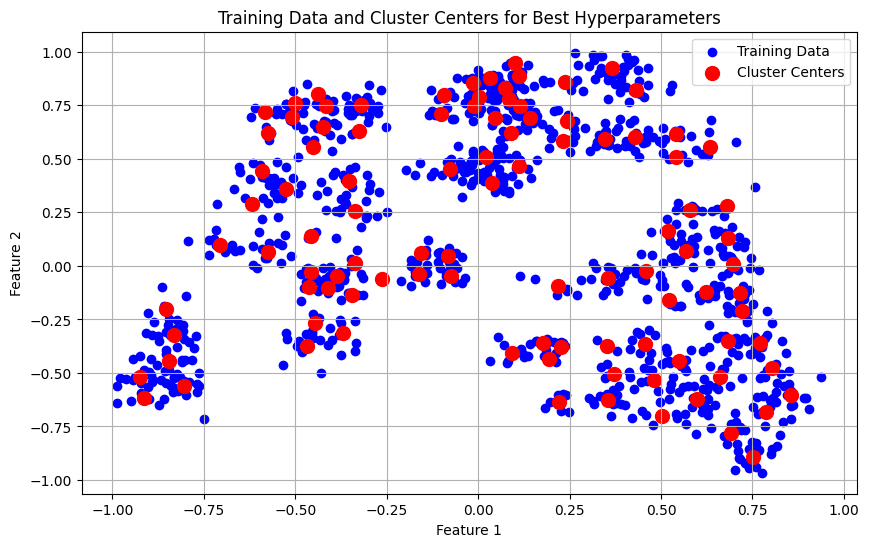

In [28]:
# Assuming the best centers are accessible like this
best_centers = kmeans.cluster_centers_  # Modify as necessary to get the right centers

plt.figure(figsize=(10, 6))
if isinstance(X_train, np.ndarray):
    plt.scatter(X_train[:, 0], X_train[:, 1], color='blue', label='Training Data')
else:  # Assuming DataFrame
    plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], color='blue', label='Training Data')
plt.scatter(best_centers[:, 0], best_centers[:, 1], color='red', s=100, label='Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data and Cluster Centers for Best Hyperparameters')
plt.legend()
plt.grid(True)
plt.show()


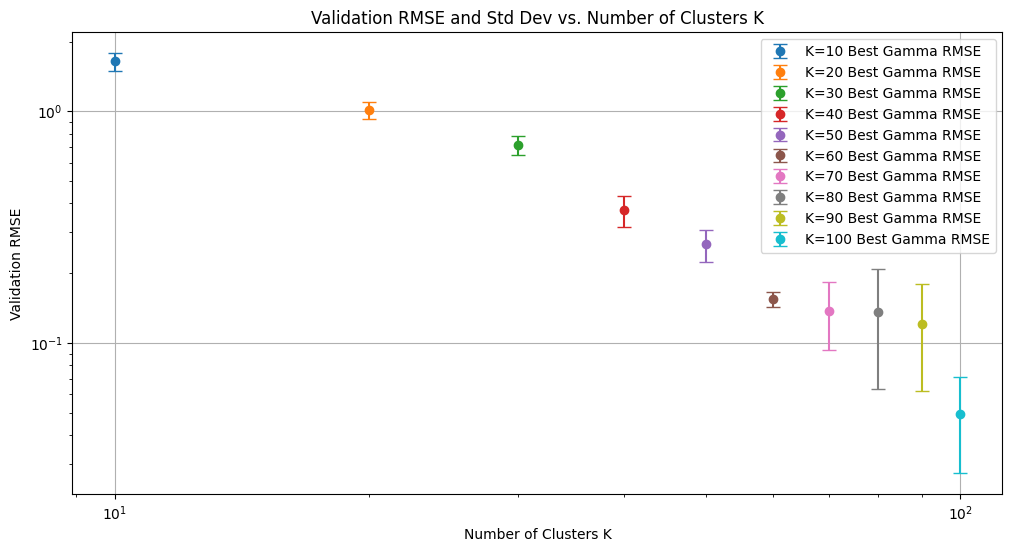

In [29]:
plt.figure(figsize=(12, 6))
for K in K_values:
    best_index = np.argmin(avg_val_rmse_per_gamma[K])  # Index of the best gamma for each K
    best_rmse = avg_val_rmse_per_gamma[K][best_index]
    best_std = std_dev_val_rmse_per_gamma[K][best_index]
    plt.errorbar(K, best_rmse, yerr=best_std, fmt='o', capsize=5, label=f'K={K} Best Gamma RMSE')

plt.xlabel('Number of Clusters K')
plt.ylabel('Validation RMSE')
plt.title('Validation RMSE and Std Dev vs. Number of Clusters K')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
best_K = best_K_overall
calculated_gammas_for_best_K = [(best_K / 32) * gamma for gamma in Log_value]  # Log_value contains the multipliers [0.01, 0.1, 1, 10, 100]

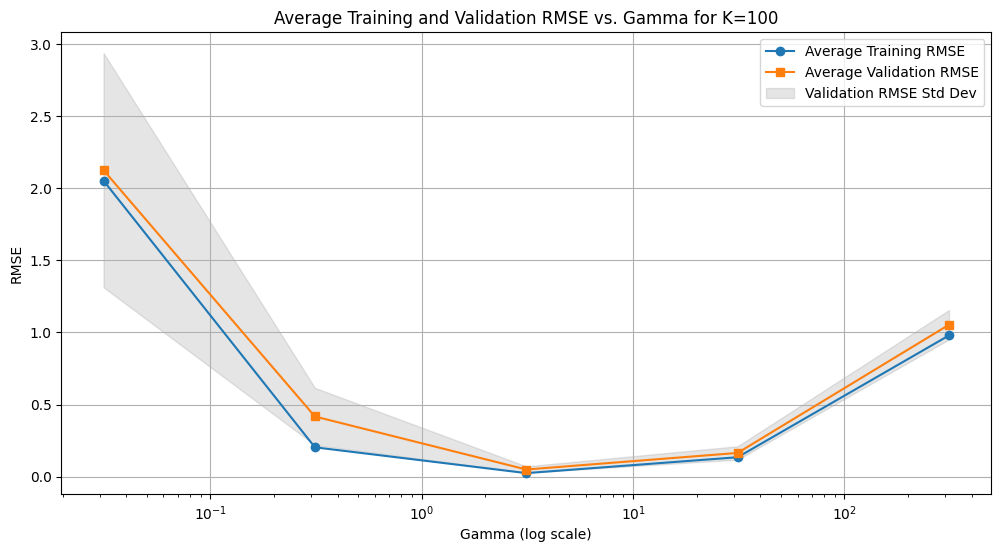

In [31]:
import matplotlib.pyplot as plt

# Now plot
plt.figure(figsize=(12, 6))
plt.plot(calculated_gammas_for_best_K, avg_train_rmse_per_gamma[best_K], label='Average Training RMSE', marker='o')
plt.plot(calculated_gammas_for_best_K, avg_val_rmse_per_gamma[best_K], label='Average Validation RMSE', marker='s')
plt.fill_between(calculated_gammas_for_best_K, 
                 np.array(avg_val_rmse_per_gamma[best_K]) - np.array(std_dev_val_rmse_per_gamma[best_K]),
                 np.array(avg_val_rmse_per_gamma[best_K]) + np.array(std_dev_val_rmse_per_gamma[best_K]),
                 color='gray', alpha=0.2, label='Validation RMSE Std Dev')
plt.xscale('log')
plt.xlabel('Gamma (log scale)')
plt.ylabel('RMSE')
plt.title(f'Average Training and Validation RMSE vs. Gamma for K={best_K}')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
kmeans = KMeans(n_clusters=100, init='random', n_init=10)
kmeans.fit(X_train)
centers = kmeans.cluster_centers_

In [34]:
X_train_rbf = rbf_kernel(X_train, centers, 3.125)
X_test_rbf = rbf_kernel(X_test, centers, 3.125)

linear_model.fit(X_train_rbf, y_train)

y_pred_test = linear_model.predict(X_test_rbf)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Test RMSE for the RBF network (part d)= {3.125}: {test_rmse}")

Test RMSE for the RBF network (part d)= 3.125: 0.0586745962990033


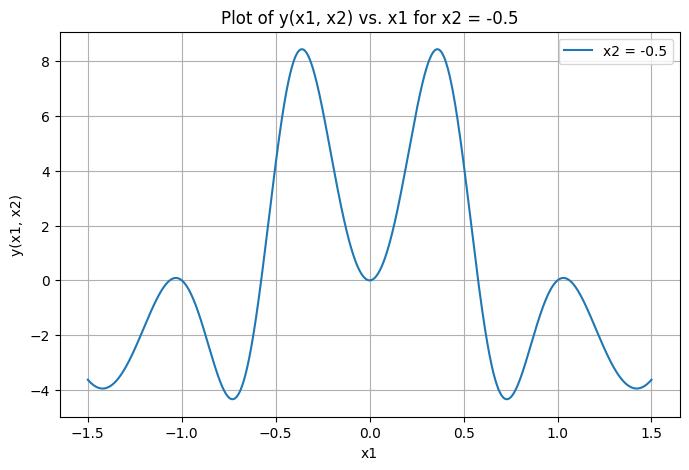

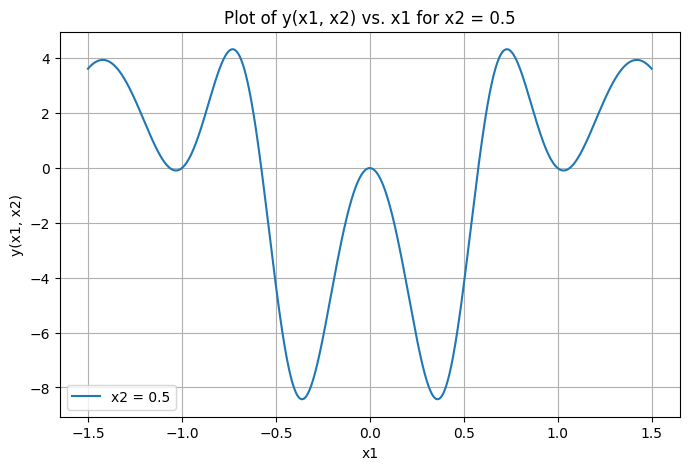

In [36]:
def target_function(x1, x2):
    return 9 * (np.cos(0.5 * np.pi * x1) + 0.1) * np.sin((4 * np.pi)/(x1**2 + 1)) * np.sin(np.pi * x2)

x1_range = np.linspace(-1.5, 1.5, 1000)
for x2 in [-0.5, 0.5]:
    y_values = target_function(x1_range, x2)
    plt.figure(figsize=(8, 5))
    plt.plot(x1_range, y_values, label=f'x2 = {x2}')
    plt.title(f'Plot of y(x1, x2) vs. x1 for x2 = {x2}')
    plt.xlabel('x1')
    plt.ylabel('y(x1, x2)')
    plt.legend()
    plt.grid()
    plt.show()

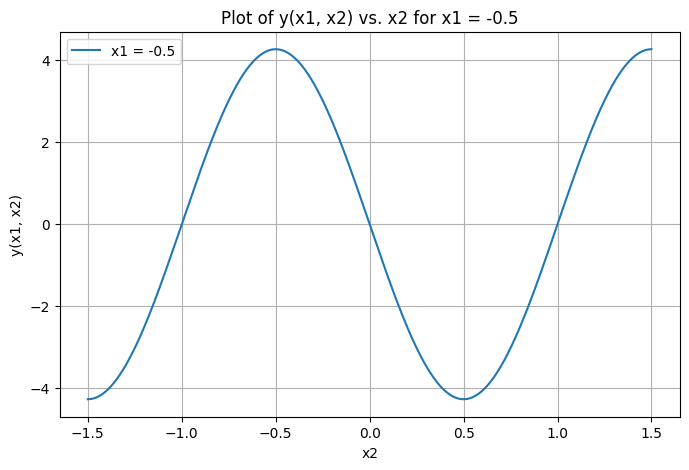

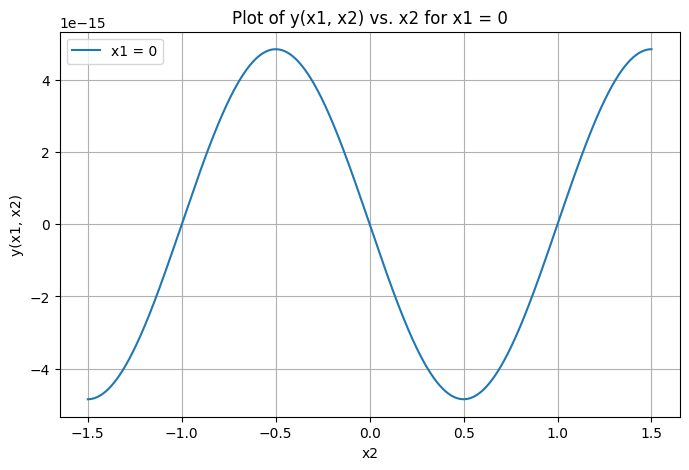

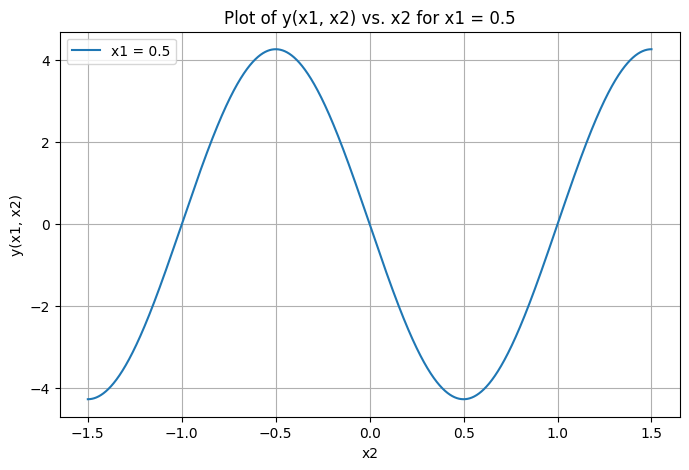

In [37]:
x2_range = np.linspace(-1.5, 1.5, 10000)
for x1 in [-0.5, 0, 0.5]:
    y_values = target_function(x1, x2_range)
    plt.figure(figsize=(8, 5))
    plt.plot(x2_range, y_values, label=f'x1 = {x1}')
    plt.title(f'Plot of y(x1, x2) vs. x2 for x1 = {x1}')
    plt.xlabel('x2')
    plt.ylabel('y(x1, x2)')
    plt.legend()
    plt.grid()
    plt.show()


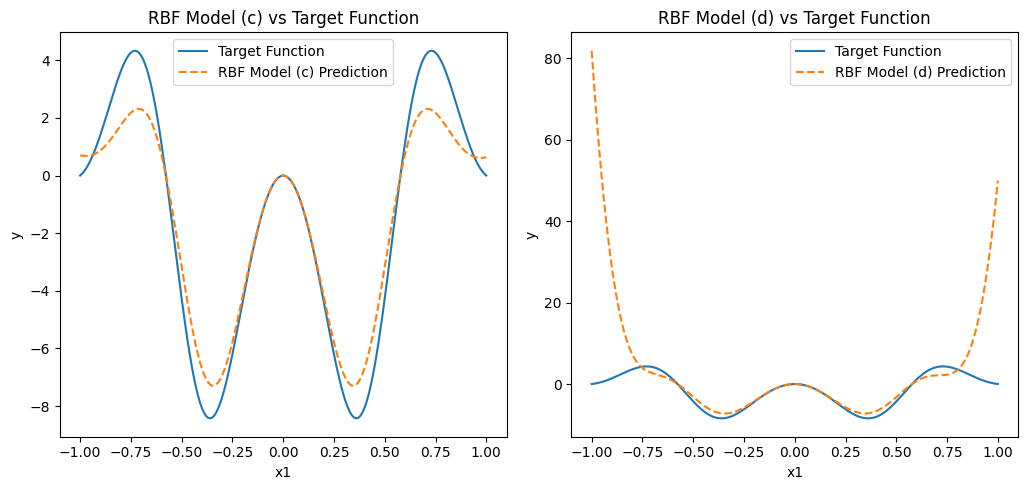

In [48]:

import numpy as np
import matplotlib.pyplot as plt

# Assuming the function target_function(x1, x2) has been defined as in your previous code
def target_function(x1, x2):
    return 9 * (np.cos(0.5 * np.pi * x1) + 0.1) * np.sin((4 * np.pi) / (x1**2 + 1)) * np.sin(np.pi * x2)

# Create a grid of x1 values
x1_values = np.arange(-1, 1.01, 0.01)
x2_fixed = 0.5

# Calculate the target function values for x2 = 0.5
y_target = target_function(x1_values, x2_fixed)

gamma_c = 25  # replace with the gamma value found by cross-validation
X_train_rbf_c = rbf_kernel(X_train, X_train, gamma_c)
model_c = LinearRegression().fit(X_train_rbf_c, y_train)

# Part (d)
# Here we find cluster centers using K-means
kmeans = KMeans(n_clusters=100, random_state=0).fit(X_train)  # replace optimal_K_from_cv with the value from CV
centers_d = kmeans.cluster_centers_
gamma_d = 3.125 # replace with the gamma value found by cross-validation for the K clusters
X_train_rbf_d = rbf_kernel(X_train, centers_d, gamma_d)
model_d = LinearRegression().fit(X_train_rbf_d, y_train)

y_pred_c = model_c.predict(rbf_kernel(np.column_stack((x1_values, np.full_like(x1_values, x2_fixed))), X_train, gamma_c))
y_pred_d = model_d.predict(rbf_kernel(np.column_stack((x1_values, np.full_like(x1_values, x2_fixed))), centers_d, 3.125))

# Now, plot the results
plt.figure(figsize=(15, 5))

# Plot for the RBF model (f)(c)
plt.subplot(1, 3, 2)
plt.plot(x1_values, y_target, label='Target Function')
plt.plot(x1_values, y_pred_c, label='RBF Model (c) Prediction', linestyle='--')
plt.title('RBF Model (c) vs Target Function')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

# Plot for the RBF model with K-means (f)(d)
plt.subplot(1, 3, 3)
plt.plot(x1_values, y_target, label='Target Function')
plt.plot(x1_values, y_pred_d, label='RBF Model (d) Prediction', linestyle='--')
plt.title('RBF Model (d) vs Target Function')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()